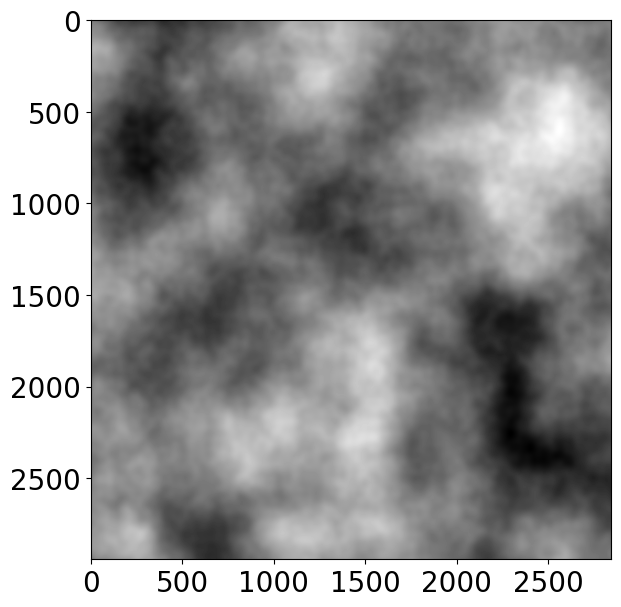

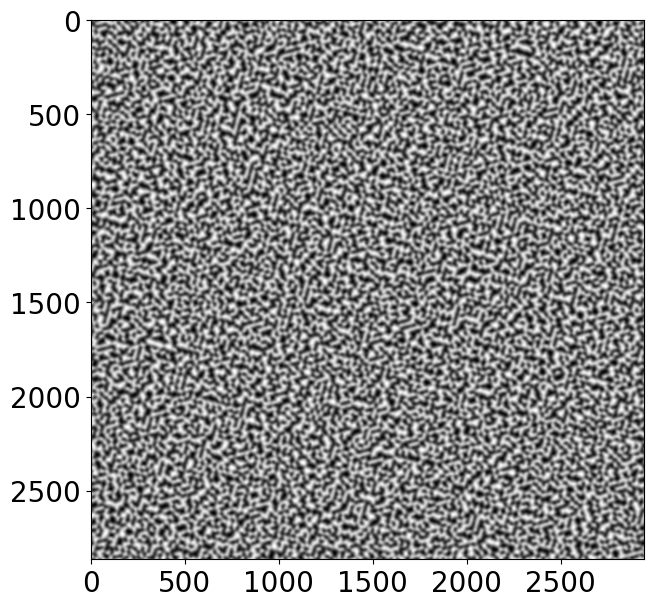

In [1]:
from perlin_noise import PerlinNoise
import numpy as np
from PIL import Image # Depends on the Pillow lib
import matplotlib.pyplot as plt
import cv2
import opensimplex as simplex


def main():
    noise1 = PerlinNoise(octaves=3)
    noise2 = PerlinNoise(octaves=6)
    noise3 = PerlinNoise(octaves=12)
    noise4 = PerlinNoise(octaves=24)
    noise5 = PerlinNoise(octaves=48)
    xpix, ypix = 2944, 2844
    pic = []
    for i in range(xpix):
        row = []
        for j in range(ypix):
            noise_val = noise1([i/xpix, j/ypix])
            noise_val += 0.5 * noise2([i/xpix, j/ypix])
            noise_val += 0.25 * noise3([i/xpix, j/ypix])
            noise_val += 0.125 * noise4([i/xpix, j/ypix])
            noise_val += 0.0625 * noise5([i/xpix, j/ypix])

            row.append(noise_val)
        pic.append(row)
               
    plt.figure(figsize=(15,7))
    plt.imshow(pic, cmap='gray')
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    #pic= cv2.cvtColor(pic,cv2.COLOR_GRAY2RGB)
    pic=np.asarray(pic,dtype=np.uint8)
    cv2.imwrite("C:/Users/evgen/Downloads/perlinnoise.jpg",pic)
    
    WIDTH = 2944
    HEIGHT = 2866
    FEATURE_SIZE = 24.0



    im = Image.new('L', (WIDTH, HEIGHT))
    for y in range(0, HEIGHT):
        for x in range(0, WIDTH):
            value = simplex.noise2(x / FEATURE_SIZE, y / FEATURE_SIZE)
            color = int((value + 1) * 128)
            im.putpixel((x, y), color)
            
        
    plt.figure(figsize=(15,7))
    plt.imshow(im, cmap='gray')
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    #im= cv2.cvtColor(im,cv2.COLOR_GRAY2RGB)
    im=np.asarray(im,dtype=np.uint8)
    cv2.imwrite("C:/Users/evgen/Downloads/simplexnoise.jpg",im)
    plt.show()
    
    
if __name__ == "__main__":
    main()